In [2]:
%matplotlib notebook

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import rcParams
from pandas import DataFrame
from textwrap import wrap
from sqlalchemy import create_engine

In [4]:
# Necessary Postgres login information
connection_string = "postgres:postgres@localhost:5432/2017_StreamingDB"
# Create the connection
engine = create_engine(f'postgresql://{connection_string}')

In [5]:
US = "Resources/usa.streams.csv"
Germany = "Resources/germany.streams.csv"
Lithuania = "Resources/lithuania.streams.csv"
France = "Resources/france.streams.csv"
Norway = "Resources/norway.streams.csv"
All = "Resources/all.streams.csv"

US_df = pd.read_csv(US)
Germany_df = pd.read_csv(Germany)
Lithuania_df = pd.read_csv(Lithuania)
France_df = pd.read_csv(France)
Norway_df = pd.read_csv(Norway)
All_df = pd.read_csv(All)

In [6]:
# Top_BB = pd.read_sql_query('''SELECT *  FROM top_billboard WHERE rank < '11';''', engine)
# # Top_BB.set_index(('rank'), inplace=True)
# #Rename Columns and Drop Columns
# Top_BB['Artist_and_Track_Name']= Top_BB['track'].values + ' - ' + Top_BB['artist']
# Billboard_df = pd.DataFrame(Top_BB, columns = ['Artist_and_Track_Name', 'rank']) 

Billboard_data = [['Luis Fonsi - Despacito - Remix', 1], ['Ed Sheeran - Shape of You', 2], ['Migos - Bad and Boujee (feat. Lil Uzi Vert)',3], ['Kendrick Lamar - HUMBLE.',4], ["Bruno Mars - That's What I Like",5], ['Post Malone - Congratulations',6], ['Lil Uzi Vert - XO TOUR Llif3',7], ['Future - Mask Off',8], ['The Chainsmokers - Closer',9] , ["DJ Khaled - I'm the One",10]]

Billboard_df = pd.DataFrame(Billboard_data, columns = ['Artist_and_Track_Name', 'Billboard_Position']) 
Billboard_df

,Artist_and_Track_Name,Billboard_Position
0,Luis Fonsi - Despacito - Remix,1
1,Ed Sheeran - Shape of You,2
2,Migos - Bad and Boujee (feat. Lil Uzi Vert),3
3,Kendrick Lamar - HUMBLE.,4
4,Bruno Mars - That's What I Like,5
5,Post Malone - Congratulations,6
6,Lil Uzi Vert - XO TOUR Llif3,7
7,Future - Mask Off,8
8,The Chainsmokers - Closer,9
9,DJ Khaled - I'm the One,10


In [7]:
AllvsBB_df = pd.merge(Billboard_df, All_df,
                                 how='inner', on='Artist_and_Track_Name')
AllvsBB_df

,Artist_and_Track_Name,Billboard_Position,All_Streams,Position
0,Luis Fonsi - Despacito - Remix,1,436357471,2
1,Ed Sheeran - Shape of You,2,672625163,1
2,Migos - Bad and Boujee (feat. Lil Uzi Vert),3,238663204,24
3,Kendrick Lamar - HUMBLE.,4,427988388,3
4,Bruno Mars - That's What I Like,5,309636662,11
5,Post Malone - Congratulations,6,345297028,6
6,Lil Uzi Vert - XO TOUR Llif3,7,385291739,4
7,Future - Mask Off,8,330301606,9
8,The Chainsmokers - Closer,9,227380728,28
9,DJ Khaled - I'm the One,10,330539999,8


In [8]:
USvsALL_df = pd.merge(AllvsBB_df, US_df,
                                 how='inner', on='Artist_and_Track_Name')
USvsALL_df

USvsALL_df = USvsALL_df.rename(columns={"Position_x":"World_Position",
                                                              "Position_y":"US_Position"})
USvsALL_df

,Artist_and_Track_Name,Billboard_Position,All_Streams,World_Position,US_Streams,US_Position
0,Luis Fonsi - Despacito - Remix,1,436357471,2,235012075,7
1,Ed Sheeran - Shape of You,2,672625163,1,282319891,4
2,Migos - Bad and Boujee (feat. Lil Uzi Vert),3,238663204,24,211518962,12
3,Kendrick Lamar - HUMBLE.,4,427988388,3,339677217,1
4,Bruno Mars - That's What I Like,5,309636662,11,208416179,13
5,Post Malone - Congratulations,6,345297028,6,285451131,3
6,Lil Uzi Vert - XO TOUR Llif3,7,385291739,4,316206696,2
7,Future - Mask Off,8,330301606,9,241828211,5
8,The Chainsmokers - Closer,9,227380728,28,137009517,39
9,DJ Khaled - I'm the One,10,330539999,8,206524898,14


In [9]:
GermanyvsALL_df = pd.merge(USvsALL_df, Germany_df,
                                 how='inner', on='Artist_and_Track_Name')
GermanyvsALL_df

GermanyvsALL_df = GermanyvsALL_df.rename(columns={"Position":"Germany_Position"})

GermanyvsALL_df

,Artist_and_Track_Name,Billboard_Position,All_Streams,World_Position,US_Streams,US_Position,Germany_Streams,Germany_Position
0,Luis Fonsi - Despacito - Remix,1,436357471,2,235012075,7,50855083,5
1,Ed Sheeran - Shape of You,2,672625163,1,282319891,4,97689020,1
2,Migos - Bad and Boujee (feat. Lil Uzi Vert),3,238663204,24,211518962,12,8292474,214
3,Kendrick Lamar - HUMBLE.,4,427988388,3,339677217,1,24646647,62
4,Bruno Mars - That's What I Like,5,309636662,11,208416179,13,12108870,150
5,Post Malone - Congratulations,6,345297028,6,285451131,3,19426345,81
6,Lil Uzi Vert - XO TOUR Llif3,7,385291739,4,316206696,2,21237910,71
7,Future - Mask Off,8,330301606,9,241828211,5,31069433,36
8,The Chainsmokers - Closer,9,227380728,28,137009517,39,18787297,87
9,DJ Khaled - I'm the One,10,330539999,8,206524898,14,33675139,30


In [10]:
LithuaniavsALL_df = pd.merge(GermanyvsALL_df, Lithuania_df,
                                 how='inner', on='Artist_and_Track_Name')
LithuaniavsALL_df = LithuaniavsALL_df.rename(columns={"Position":"Lithuania_Position"})

LithuaniavsALL_df

,Artist_and_Track_Name,Billboard_Position,All_Streams,World_Position,US_Streams,US_Position,Germany_Streams,Germany_Position,Lithuania_Streams,Lithuania_Position
0,Luis Fonsi - Despacito - Remix,1,436357471,2,235012075,7,50855083,5,391058,7
1,Ed Sheeran - Shape of You,2,672625163,1,282319891,4,97689020,1,904314,1
2,Migos - Bad and Boujee (feat. Lil Uzi Vert),3,238663204,24,211518962,12,8292474,214,18117,241
3,Kendrick Lamar - HUMBLE.,4,427988388,3,339677217,1,24646647,62,400471,5
4,Bruno Mars - That's What I Like,5,309636662,11,208416179,13,12108870,150,209721,44
5,Post Malone - Congratulations,6,345297028,6,285451131,3,19426345,81,208533,45
6,Lil Uzi Vert - XO TOUR Llif3,7,385291739,4,316206696,2,21237910,71,252127,31
7,Future - Mask Off,8,330301606,9,241828211,5,31069433,36,239174,34
8,The Chainsmokers - Closer,9,227380728,28,137009517,39,18787297,87,98748,104
9,DJ Khaled - I'm the One,10,330539999,8,206524898,14,33675139,30,262484,26


In [11]:
NorwayvsALL_df = pd.merge(LithuaniavsALL_df, Norway_df,
                                 how='inner', on='Artist_and_Track_Name')
NorwayvsALL_df = NorwayvsALL_df.rename(columns={"Position":"Norway_Position"})

NorwayvsALL_df

,Artist_and_Track_Name,Billboard_Position,All_Streams,World_Position,US_Streams,US_Position,Germany_Streams,Germany_Position,Lithuania_Streams,Lithuania_Position,Norway_Streams,Norway_Position
0,Luis Fonsi - Despacito - Remix,1,436357471,2,235012075,7,50855083,5,391058,7,30053768,2
1,Ed Sheeran - Shape of You,2,672625163,1,282319891,4,97689020,1,904314,1,31152940,1
2,Migos - Bad and Boujee (feat. Lil Uzi Vert),3,238663204,24,211518962,12,8292474,214,18117,241,3279107,176
3,Kendrick Lamar - HUMBLE.,4,427988388,3,339677217,1,24646647,62,400471,5,10430524,42
4,Bruno Mars - That's What I Like,5,309636662,11,208416179,13,12108870,150,209721,44,4523747,129
5,Post Malone - Congratulations,6,345297028,6,285451131,3,19426345,81,208533,45,6515909,93
6,Lil Uzi Vert - XO TOUR Llif3,7,385291739,4,316206696,2,21237910,71,252127,31,7685338,72
7,Future - Mask Off,8,330301606,9,241828211,5,31069433,36,239174,34,11091138,33
8,The Chainsmokers - Closer,9,227380728,28,137009517,39,18787297,87,98748,104,4519701,130
9,DJ Khaled - I'm the One,10,330539999,8,206524898,14,33675139,30,262484,26,12854604,21


In [12]:
FrancevsALL_df = pd.merge(NorwayvsALL_df, France_df,
                                 how='inner', on='Artist_and_Track_Name')
FrancevsALL_df = FrancevsALL_df.rename(columns={"Position":"France_Position"})

FrancevsALL_df

,Artist_and_Track_Name,Billboard_Position,All_Streams,World_Position,US_Streams,US_Position,Germany_Streams,Germany_Position,Lithuania_Streams,Lithuania_Position,Norway_Streams,Norway_Position,France_Streams,France_Position
0,Luis Fonsi - Despacito - Remix,1,436357471,2,235012075,7,50855083,5,391058,7,30053768,2,15970056,19
1,Ed Sheeran - Shape of You,2,672625163,1,282319891,4,97689020,1,904314,1,31152940,1,46245081,1
2,Migos - Bad and Boujee (feat. Lil Uzi Vert),3,238663204,24,211518962,12,8292474,214,18117,241,3279107,176,4508608,237
3,Kendrick Lamar - HUMBLE.,4,427988388,3,339677217,1,24646647,62,400471,5,10430524,42,11262132,61
4,Bruno Mars - That's What I Like,5,309636662,11,208416179,13,12108870,150,209721,44,4523747,129,6319410,161
5,Post Malone - Congratulations,6,345297028,6,285451131,3,19426345,81,208533,45,6515909,93,4315052,251
6,Lil Uzi Vert - XO TOUR Llif3,7,385291739,4,316206696,2,21237910,71,252127,31,7685338,72,8230607,103
7,Future - Mask Off,8,330301606,9,241828211,5,31069433,36,239174,34,11091138,33,18945509,9
8,The Chainsmokers - Closer,9,227380728,28,137009517,39,18787297,87,98748,104,4519701,130,3813910,275
9,DJ Khaled - I'm the One,10,330539999,8,206524898,14,33675139,30,262484,26,12854604,21,11453179,57


In [13]:
Streams = FrancevsALL_df.drop(['World_Position', 'US_Position', 'Germany_Position',
                               'Lithuania_Position', 'France_Position', 'Norway_Position'], axis=1)
Streams.set_index('Billboard_Position')
Streams
# export_csv = Streams.to_csv('Resources/Streams.csv')

,Artist_and_Track_Name,Billboard_Position,All_Streams,US_Streams,Germany_Streams,Lithuania_Streams,Norway_Streams,France_Streams
0,Luis Fonsi - Despacito - Remix,1,436357471,235012075,50855083,391058,30053768,15970056
1,Ed Sheeran - Shape of You,2,672625163,282319891,97689020,904314,31152940,46245081
2,Migos - Bad and Boujee (feat. Lil Uzi Vert),3,238663204,211518962,8292474,18117,3279107,4508608
3,Kendrick Lamar - HUMBLE.,4,427988388,339677217,24646647,400471,10430524,11262132
4,Bruno Mars - That's What I Like,5,309636662,208416179,12108870,209721,4523747,6319410
5,Post Malone - Congratulations,6,345297028,285451131,19426345,208533,6515909,4315052
6,Lil Uzi Vert - XO TOUR Llif3,7,385291739,316206696,21237910,252127,7685338,8230607
7,Future - Mask Off,8,330301606,241828211,31069433,239174,11091138,18945509
8,The Chainsmokers - Closer,9,227380728,137009517,18787297,98748,4519701,3813910
9,DJ Khaled - I'm the One,10,330539999,206524898,33675139,262484,12854604,11453179


In [55]:
Position = FrancevsALL_df.drop(['All_Streams','US_Streams', 'Germany_Streams',
                               'Lithuania_Streams', 'France_Streams', 'Norway_Streams'], axis=1)

Position.set_index('Billboard_Position')

,Artist_and_Track_Name,World_Position,US_Position,Germany_Position,Lithuania_Position,Norway_Position,France_Position
Billboard_Position,,,,,,,
1,Luis Fonsi - Despacito - Remix,2,7,5,7,2,19
2,Ed Sheeran - Shape of You,1,4,1,1,1,1
3,Migos - Bad and Boujee (feat. Lil Uzi Vert),24,12,214,241,176,237
4,Kendrick Lamar - HUMBLE.,3,1,62,5,42,61
5,Bruno Mars - That's What I Like,11,13,150,44,129,161
6,Post Malone - Congratulations,6,3,81,45,93,251
7,Lil Uzi Vert - XO TOUR Llif3,4,2,71,31,72,103
8,Future - Mask Off,9,5,36,34,33,9
9,The Chainsmokers - Closer,28,39,87,104,130,275


<IPython.core.display.Javascript object>


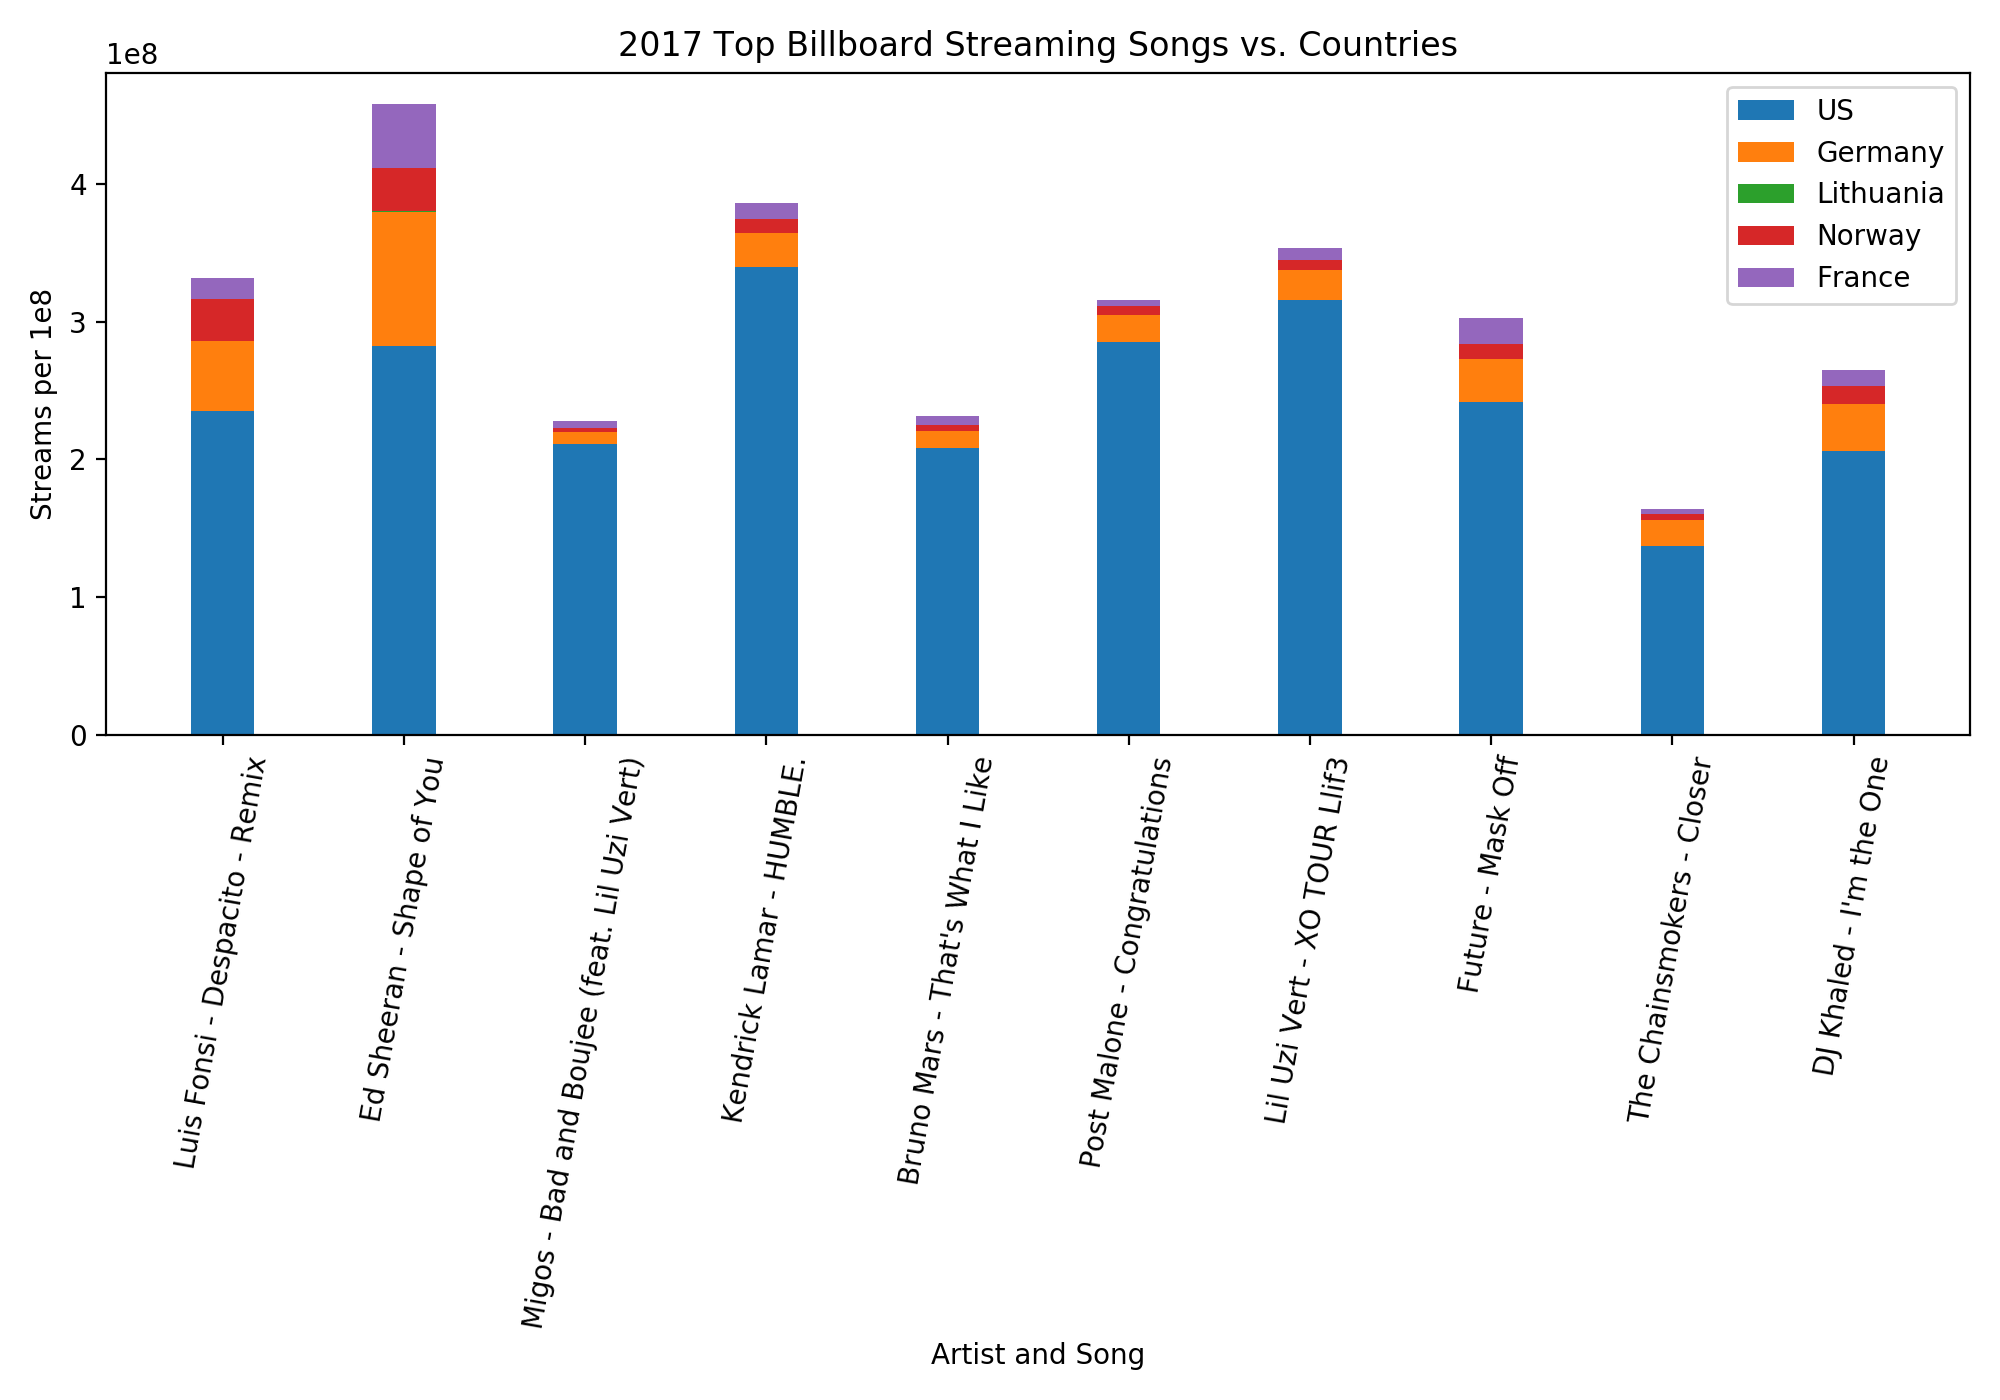

In [56]:
raw_data = pd.read_csv('Resources/Streams.csv')

data = raw_data[:][['Artist_and_Track_Name','All_Streams', 'US_Streams', 'Germany_Streams',
                               'Lithuania_Streams', 'Norway_Streams', 'France_Streams']]

Tracks = ['Luis Fonsi - Despacito - Remix','Ed Sheeran - Shape of You','Migos - Bad and Boujee (feat. Lil Uzi Vert)','Kendrick Lamar - HUMBLE.',
            "Bruno Mars - That's What I Like", 'Post Malone - Congratulations', 'Lil Uzi Vert - XO TOUR Llif3',
            'Future - Mask Off','The Chainsmokers - Closer',"DJ Khaled - I'm the One"]


Track = data.iloc[:,0]
barAll = data.iloc[:,1]
barUS = data.iloc[:,2]
barGermany = data.iloc[:,3]
barLithuania = data.iloc[:,4]
barNorway = data.iloc[:,5]
barFrance = data.iloc[:,6]
indx=np.arange(len(data))

plt.figure(figsize=(10,7))

graphUS = plt.bar(x=indx, height=barUS, width=0.35, label="US")
graphGermany = plt.bar(x=indx, height=barGermany, width=0.35, bottom=barUS, label="Germany")
graphLithuania = plt.bar(x=indx, height=barLithuania, width=0.35, bottom=barGermany+barUS, label="Lithuania")
graphNorway = plt.bar(x=indx, height=barNorway, width=0.35, bottom=barLithuania+barGermany+barUS, label="Norway")
graphFrance = plt.bar(x=indx, height=barFrance, width=0.35, bottom=barNorway+barLithuania+barGermany+barUS, label="France")

plt.xlabel('Artist and Song')
plt.ylabel('Streams per 1e8')
# plt.legend('US', 'Germany', 'Lithuania', 'Norway', 'France')
plt.xticks(indx, Track, rotation=80)

plt.title('2017 Top Billboard Streaming Songs vs. Countries')
plt.legend(loc="best")
rcParams.update({'figure.autolayout': True})
plt.show()

plt.savefig("Images/BarTopTenvssixcountries.png")
